In [ ]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
!pip install osmnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
#library
import pandas as pd
from geopy.distance import geodesic
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
from heapq import heappop, heappush

In [ ]:
df = pd.read_csv("combine_tije_opendata_cleaned.csv")
df

,route_id;route_long_name;route_color;trip_id;service_id;direction_id;stop_sequence;stop_name;stop_lat;stop_lon;location_type;shape_pt_sequence;shape_id
0,1;Blok M - Kota;D62126;1-R07;SH;0;0;Blok M;-6....
1,1;Blok M - Kota;D62126;1-R08;SH;1;0;Kali Besar...
2,1;Blok M - Kota;D62126;1-R07;SH;0;1;Asean;-6.2...
3,1;Blok M - Kota;D62126;1-R08;SH;1;1;Museum Fat...
4,1;Blok M - Kota;D62126;1-R08;SH;1;2;Kota;-6.13...
...,...
24658,TP2;Terminal Baranangsiang - Cibubur;FFFF6D;TP...
24659,TP2;Terminal Baranangsiang - Cibubur;FFFF6D;TP...
24660,TP2;Terminal Baranangsiang - Cibubur;FFFF6D;TP...
24661,TP2;Terminal Baranangsiang - Cibubur;FFFF6D;TP...


# **Preprocessing**

In [ ]:
df = pd.read_csv('combine_tije_opendata_cleaned.csv', delimiter=';')
df.to_csv('trans jakarta ro.csv', index=False)
df

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,Blok M - Kota,D62126,1-R07,SH,0,0,Blok M,-6.243312,106.801750,0,1,usj3
1,1,Blok M - Kota,D62126,1-R08,SH,1,0,Kali Besar Barat,-6.135355,106.811430,0,1,mlcx
2,1,Blok M - Kota,D62126,1-R07,SH,0,1,Asean,-6.239911,106.798970,0,1,usj3
3,1,Blok M - Kota,D62126,1-R08,SH,1,1,Museum Fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,Blok M - Kota,D62126,1-R08,SH,1,2,Kota,-6.136827,106.814876,0,1,mlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24658,TP2,Terminal Baranangsiang - Cibubur,FFFF6D,TP2-R02,TP_HK,1,2,Exit Tol Sirkuit Sentul 2,-6.531795,106.853189,0,1,g7oz
24659,TP2,Terminal Baranangsiang - Cibubur,FFFF6D,TP2-R01,TP_HK,0,2,Exit Tol Sirkuit Sentul 1,-6.531746,106.851656,0,1,yb9l
24660,TP2,Terminal Baranangsiang - Cibubur,FFFF6D,TP2-R01,TP_HK,0,3,Pintu Tol Citereup 1,-6.484757,106.872287,0,1,yb9l
24661,TP2,Terminal Baranangsiang - Cibubur,FFFF6D,TP2-R02,TP_HK,1,3,Terminal Baranangsiang,-6.604101,106.806038,0,1,g7oz


In [ ]:
def data_cleaning(data):
    data = missing_val(data)
    data = inconsisstant_inpu(data)
    data = duplikat(data)
    return data

def missing_val(df):
    print("Jumlah nilai hilang sebelum dihapus:")
    print(df.isnull().sum())
    df = df.dropna()
    print("Jumlah nilai hilang setelah dihapus:")
    print(df.isnull().sum())
    return df

def inconsisstant_inpu(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.strip().str.lower()
            df[col].unique()
    return df

def duplikat(df):
    df = df.drop_duplicates()
    return df

data_file = "trans jakarta ro.csv"
df = pd.read_csv(data_file)
cleaned_data = data_cleaning(df)
cleaned_data.to_csv("trans jakarta ro.csv", index=False)


Jumlah nilai hilang sebelum dihapus:
route_id             0
route_long_name      0
route_color          0
trip_id              0
service_id           0
direction_id         0
stop_sequence        0
stop_name            0
stop_lat             0
stop_lon             0
location_type        0
shape_pt_sequence    0
shape_id             0
dtype: int64
Jumlah nilai hilang setelah dihapus:
route_id             0
route_long_name      0
route_color          0
trip_id              0
service_id           0
direction_id         0
stop_sequence        0
stop_name            0
stop_lat             0
stop_lon             0
location_type        0
shape_pt_sequence    0
shape_id             0
dtype: int64


In [ ]:
df = pd.read_csv("trans jakarta ro.csv")
df

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,blok m - kota,d62126,1-r07,sh,0,0,blok m,-6.243312,106.801750,0,1,usj3
1,1,blok m - kota,d62126,1-r08,sh,1,0,kali besar barat,-6.135355,106.811430,0,1,mlcx
2,1,blok m - kota,d62126,1-r07,sh,0,1,asean,-6.239911,106.798970,0,1,usj3
3,1,blok m - kota,d62126,1-r08,sh,1,1,museum fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,blok m - kota,d62126,1-r08,sh,1,2,kota,-6.136827,106.814876,0,1,mlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13881,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r02,tp_hk,1,2,exit tol sirkuit sentul 2,-6.531795,106.853189,0,1,g7oz
13882,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r01,tp_hk,0,2,exit tol sirkuit sentul 1,-6.531746,106.851656,0,1,yb9l
13883,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r01,tp_hk,0,3,pintu tol citereup 1,-6.484757,106.872287,0,1,yb9l
13884,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r02,tp_hk,1,3,terminal baranangsiang,-6.604101,106.806038,0,1,g7oz


In [ ]:
df['stop_lat'] = pd.to_numeric(df['stop_lat'], errors='coerce')
df['stop_lon'] = pd.to_numeric(df['stop_lon'], errors='coerce')

# Periksa apakah ada nilai yang gagal dikonversi (menjadi NaN)
print("Jumlah nilai NaN setelah konversi:")
print(df[['stop_lat', 'stop_lon']].isnull().sum())

# Menghapus baris dengan nilai NaN setelah konversi (opsional)
data_cleaned = df.dropna(subset=['stop_lat', 'stop_lon'])

# Menampilkan hasil DataFrame
print("\nData setelah konversi tipe:")
print(data_cleaned.dtypes)
data_cleaned.to_csv("trans-jakarta-ro.csv", index=False)

Jumlah nilai NaN setelah konversi:
stop_lat    0
stop_lon    0
dtype: int64

Data setelah konversi tipe:
route_id              object
route_long_name       object
route_color           object
trip_id               object
service_id            object
direction_id           int64
stop_sequence          int64
stop_name             object
stop_lat             float64
stop_lon             float64
location_type          int64
shape_pt_sequence      int64
shape_id              object
dtype: object


In [ ]:
df = pd.read_csv("trans-jakarta-ro.csv")
df

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,blok m - kota,d62126,1-r07,sh,0,0,blok m,-6.243312,106.801750,0,1,usj3
1,1,blok m - kota,d62126,1-r08,sh,1,0,kali besar barat,-6.135355,106.811430,0,1,mlcx
2,1,blok m - kota,d62126,1-r07,sh,0,1,asean,-6.239911,106.798970,0,1,usj3
3,1,blok m - kota,d62126,1-r08,sh,1,1,museum fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,blok m - kota,d62126,1-r08,sh,1,2,kota,-6.136827,106.814876,0,1,mlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13881,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r02,tp_hk,1,2,exit tol sirkuit sentul 2,-6.531795,106.853189,0,1,g7oz
13882,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r01,tp_hk,0,2,exit tol sirkuit sentul 1,-6.531746,106.851656,0,1,yb9l
13883,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r01,tp_hk,0,3,pintu tol citereup 1,-6.484757,106.872287,0,1,yb9l
13884,tp2,terminal baranangsiang - cibubur,ffff6d,tp2-r02,tp_hk,1,3,terminal baranangsiang,-6.604101,106.806038,0,1,g7oz


In [ ]:
df = pd.read_csv("trans-jakarta.csv")
df

,direction_id,stop_sequence,stop_lat,stop_lon,location_type,shape_pt_sequence,route_id_1,route_id_10,route_id_10a,route_id_10b,...,stop_name_yayasan perguruan rakyat 2,stop_name_yayasan santo yakobus,stop_name_ybk,stop_name_yodya tower,stop_name_yon arhanud - 10 pesanggrahan,stop_name_yos sudarso kodamar,stop_name_yp ippi jakarta,stop_name_ypi al huda kb. jeruk,stop_name_ypi asyaadah,stop_name_ytki
0,0,0,-6.243312,106.801750,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,-6.135355,106.811430,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,-6.239911,106.798970,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,-6.133882,106.812140,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2,-6.136827,106.814876,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0,13,-6.240210,106.830969,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,1,13,-6.223631,106.709014,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0,2,-6.236393,106.747600,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,1,2,-6.239238,106.807773,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Load the correct CSV file to make sure it has 'route_long_name'
df = pd.read_csv("trans jakarta ro.csv")  # Change to the relevant CSV file if needed

# Filter using 'route_long_name'
filtered_df = df[df['route_long_name'].str.contains(r'blok m', case=False, na=False)]
filtered_df.to_csv("sampel-trans-jakarta.csv", index=False)
filtered_df

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,blok m - kota,d62126,1-r07,sh,0,0,blok m,-6.243312,106.801750,0,1,usj3
1,1,blok m - kota,d62126,1-r08,sh,1,0,kali besar barat,-6.135355,106.811430,0,1,mlcx
2,1,blok m - kota,d62126,1-r07,sh,0,1,asean,-6.239911,106.798970,0,1,usj3
3,1,blok m - kota,d62126,1-r08,sh,1,1,museum fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,blok m - kota,d62126,1-r08,sh,1,2,kota,-6.136827,106.814876,0,1,mlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,m1,blok m - kota,24ff24,m1-r06,sh,1,7,harmoni,-6.162764,106.819961,0,1,1d11
12890,m1,blok m - kota,24ff24,m1-r06,sh,1,8,monas,-6.176252,106.822922,0,1,1d11
12891,m1,blok m - kota,24ff24,m1-r05,sh,0,8,benhil 2,-6.216775,106.815400,0,1,2dmc
12892,m1,blok m - kota,24ff24,m1-r06,sh,1,9,bank indonesia arah selatan,-6.184784,106.823260,0,1,1d11


:# **Data Exploration and Transforming**

In [ ]:
df= pd.read_csv("sampel-trans-jakarta.csv")
df

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,blok m - kota,d62126,1-r07,sh,0,0,blok m,-6.243312,106.801750,0,1,usj3
1,1,blok m - kota,d62126,1-r08,sh,1,0,kali besar barat,-6.135355,106.811430,0,1,mlcx
2,1,blok m - kota,d62126,1-r07,sh,0,1,asean,-6.239911,106.798970,0,1,usj3
3,1,blok m - kota,d62126,1-r08,sh,1,1,museum fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,blok m - kota,d62126,1-r08,sh,1,2,kota,-6.136827,106.814876,0,1,mlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,m1,blok m - kota,24ff24,m1-r06,sh,1,7,harmoni,-6.162764,106.819961,0,1,1d11
1282,m1,blok m - kota,24ff24,m1-r06,sh,1,8,monas,-6.176252,106.822922,0,1,1d11
1283,m1,blok m - kota,24ff24,m1-r05,sh,0,8,benhil 2,-6.216775,106.815400,0,1,2dmc
1284,m1,blok m - kota,24ff24,m1-r06,sh,1,9,bank indonesia arah selatan,-6.184784,106.823260,0,1,1d11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   route_id           1286 non-null   object 
 1   route_long_name    1286 non-null   object 
 2   route_color        1286 non-null   object 
 3   trip_id            1286 non-null   object 
 4   service_id         1286 non-null   object 
 5   direction_id       1286 non-null   int64  
 6   stop_sequence      1286 non-null   int64  
 7   stop_name          1286 non-null   object 
 8   stop_lat           1286 non-null   float64
 9   stop_lon           1286 non-null   float64
 10  location_type      1286 non-null   int64  
 11  shape_pt_sequence  1286 non-null   int64  
 12  shape_id           1286 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 130.7+ KB


In [ ]:
df.describe()

,direction_id,stop_sequence,stop_lat,stop_lon,location_type,shape_pt_sequence
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.0,1286.0
mean,0.508554,17.125972,-6.244167,106.806866,0.0,1.0
std,0.500121,12.299745,0.037874,0.033875,0.0,0.0
min,0.000000,0.000000,-6.369608,106.741000,0.0,1.0
25%,0.000000,7.000000,-6.263354,106.789280,0.0,1.0
50%,1.000000,15.000000,-6.243369,106.802300,0.0,1.0
75%,1.000000,25.000000,-6.225566,106.823213,0.0,1.0
max,1.000000,57.000000,-6.109560,107.002810,0.0,1.0


In [ ]:
print(df.index)

RangeIndex(start=0, stop=1286, step=1)


In [ ]:
df.sort_values(["route_id", "route_long_name", "stop_sequence"],
               ascending=[False, True, False]).head(30)


,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
1271,m1,blok m - kota,24ff24,m1-r06,sh,1,26,blok m,-6.243312,106.801750,0,1,1d11
1270,m1,blok m - kota,24ff24,m1-r06,sh,1,25,kejaksaan agung,-6.240460,106.798482,0,1,1d11
1269,m1,blok m - kota,24ff24,m1-r06,sh,1,24,masjid agung,-6.236477,106.798482,0,1,1d11
1268,m1,blok m - kota,24ff24,m1-r06,sh,1,23,bundaran senayan d-e-f,-6.227941,106.800905,0,1,1d11
1267,m1,blok m - kota,24ff24,m1-r06,sh,1,22,gelora bung karno,-6.224286,106.805761,0,1,1d11
1265,m1,blok m - kota,24ff24,m1-r06,sh,1,21,komdak 1,-6.222333,106.814070,0,1,1d11
1266,m1,blok m - kota,24ff24,m1-r05,sh,0,21,kali besar barat,-6.135355,106.811430,0,1,2dmc
1263,m1,blok m - kota,24ff24,m1-r06,sh,1,20,gatot subroto lipi arah barat,-6.227453,106.817652,0,1,1d11
1264,m1,blok m - kota,24ff24,m1-r05,sh,0,20,glodok,-6.144448,106.815417,0,1,2dmc
1259,m1,blok m - kota,24ff24,m1-r06,sh,1,19,gatot subroto jamsostek arah barat,-6.233536,106.822059,0,1,1d11


In [ ]:
df["route_long_name"].unique()

array(['blok m - kota', 'tanjung priok - blok m', 'pesanggrahan - blok m',
       'pondok labu - blok m', 'cibubur junction - blok m',
       'meruya - blok m', 'tanah abang - blok m', 'senen - blok m',
       'rempoa - blok m', 'stasiun manggarai - blok m',
       'ragunan - blok m via kemang', 'pasar minggu - blok m',
       'kampung rambutan - blok m', 'blok m - pgc', 'joglo - blok m',
       'bintaro - blok m', 'universitas indonesia - blok m',
       'bekasi barat - blok m', 'blok m - lebak bulus', 'blok m - andara'],
      dtype=object)

In [ ]:
# Filter rows
filtered_df = df[(df['route_long_name'].notnull()) & (df['stop_name'] == 'glodok')]
filtered_df


,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
7,1,blok m - kota,d62126,1-r08,sh,1,3,glodok,-6.144438,106.815498,0,1,mlcx
37,1,blok m - kota,d62126,1-r07,sh,0,17,glodok,-6.144448,106.815417,0,1,usj3
1264,m1,blok m - kota,24ff24,m1-r05,sh,0,20,glodok,-6.144448,106.815417,0,1,2dmc
1272,m1,blok m - kota,24ff24,m1-r06,sh,1,3,glodok,-6.144544,106.815514,0,1,1d11


# **Penerapan Algoritma**

## **Graph**

In [ ]:
import csv

csv_file = 'sampel-trans-jakarta.csv'

nodes = []

# Open and read the CSV file
with open(csv_file, mode='r') as file:
    reader = csv.reader(file)
    # Extract header (assuming the file has one)
    headers = next(reader)

    # Find relevant column indices
    route_id_idx = headers.index('route_id')
    route_long_name_idx = headers.index('route_long_name')
    location_name_idx = headers.index('stop_name')
    location_lat_idx = headers.index('stop_lat')
    location_lon_idx = headers.index('stop_lon')

    # Loop through each row in the CSV
    for row in reader:
        # Construct a dictionary for the current row
        node = {
            "id": row[route_id_idx],
            "name": row[route_long_name_idx],
            "location_name": row[location_name_idx],
            "location": {
                "lat": float(row[location_lat_idx]),
                "lon": float(row[location_lon_idx])
            }
        }
        nodes.append(node)

# Print the result
for node in nodes:
    print(node)


{'id': '1', 'name': 'blok m - kota', 'location_name': 'blok m', 'location': {'lat': -6.243312, 'lon': 106.80175}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'kali besar barat', 'location': {'lat': -6.135355, 'lon': 106.81143}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'asean', 'location': {'lat': -6.239911, 'lon': 106.79897}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'museum fatahillah', 'location': {'lat': -6.133882, 'lon': 106.81214}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'kota', 'location': {'lat': -6.136827, 'lon': 106.814876}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'masjid agung', 'location': {'lat': -6.236472, 'lon': 106.798412}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'bundaran senayan k-l-m', 'location': {'lat': -6.227766, 'lon': 106.800954}}
{'id': '1', 'name': 'blok m - kota', 'location_name': 'glodok', 'location': {'lat': -6.144438, 'lon': 106.815498}}
{'id': '1', 'name': 'blok m - kota', 'locati

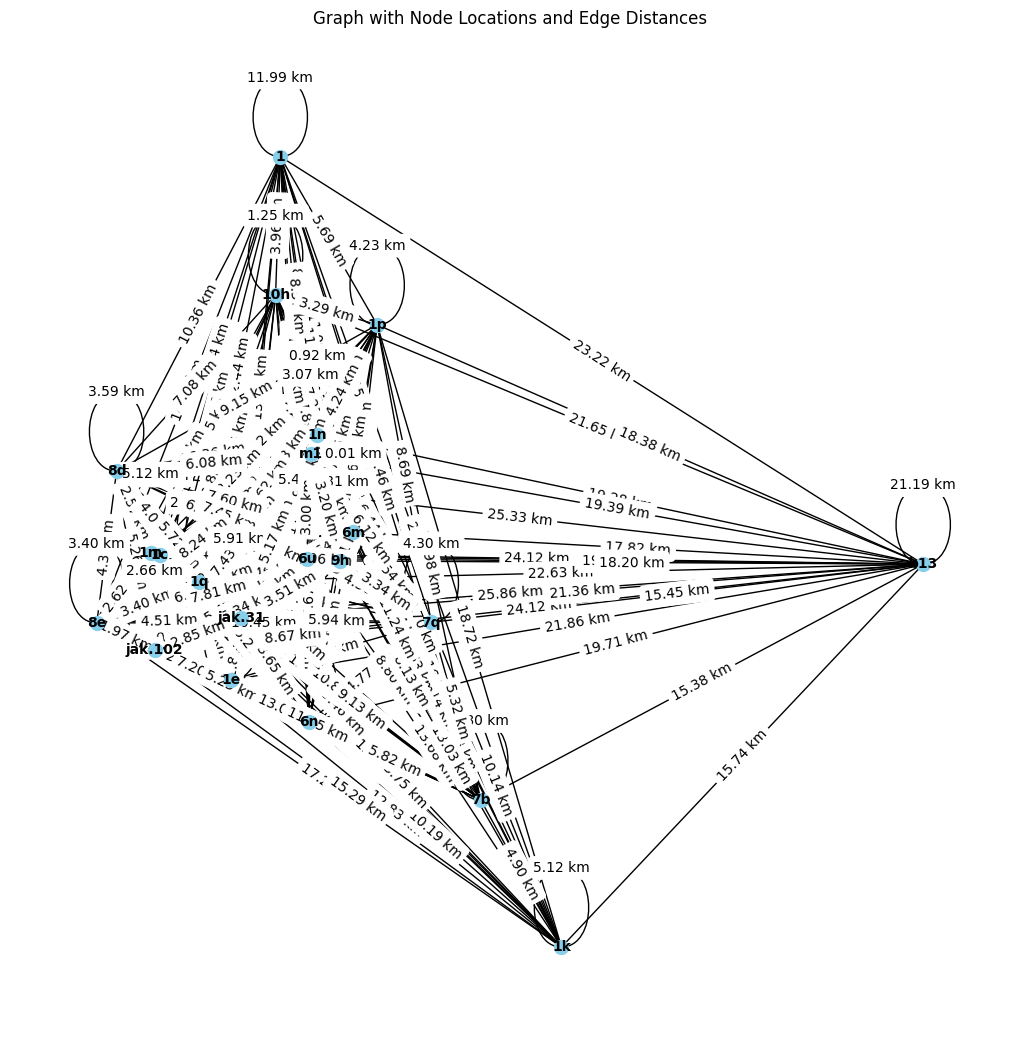

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

G = nx.Graph()

csv_file = 'sampel-trans-jakarta.csv'
def membuat_grafik():
    nodes = []

    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        headers = next(reader)

        route_id_idx = headers.index('route_id')
        route_long_name_idx = headers.index('route_long_name')
        location_name_idx = headers.index('stop_name')
        location_lat_idx = headers.index('stop_lat')
        location_lon_idx = headers.index('stop_lon')

        for row in reader:
            node = {
                "id": row[route_id_idx],
                "name": row[route_long_name_idx],
                "location_name": row[location_name_idx],
                "location": {
                    "lat": float(row[location_lat_idx]),
                    "lon": float(row[location_lon_idx])
                }
            }
            nodes.append(node)

            G.add_node(node["id"], name=node["name"], location_name=node["location_name"], lat=node["location"]["lat"], lon=node["location"]["lon"])

    return nodes

def mencari_edges(nodes):
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            node1 = nodes[i]
            node2 = nodes[j]

            loc1 = (node1["location"]["lat"], node1["location"]["lon"])
            loc2 = (node2["location"]["lat"], node2["location"]["lon"])
            distance = geodesic(loc1, loc2).kilometers

            G.add_edge(node1["id"], node2["id"], weight=distance)

def menyimpan_letak_node(nodes, filename="hasil_perhitungan2.csv"):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        writer.writerow(["location_name", "node_id", "node_name", "lat", "lon", "connected_to", "distance_km"])

        for node1, node2, data in G.edges(data=True):
            node1_data = G.nodes[node1]
            node2_data = G.nodes[node2]

            writer.writerow([
                node1_data["location_name"],  # Use location_name
                node1,
                node1_data["name"],
                node1_data["lat"],
                node1_data["lon"],
                node2_data["location_name"],  # Use location_name instead of node_id
                f"{data['weight']:.2f}"
            ])
            # Write the node2 information and connected node1 with distance
            writer.writerow([
                node2_data["location_name"],  # Use location_name instead of node_id
                node2,
                node2_data["name"],
                node2_data["lat"],
                node2_data["lon"],
                node1_data["location_name"],  # Use location_name instead of node_id
                f"{data['weight']:.2f}"
            ])

nodes = membuat_grafik()
mencari_edges(nodes)
menyimpan_letak_node(nodes)

plt.figure(figsize=(10, 10))

# Position nodes based on their latitude and longitude for visualization
pos = {node: (G.nodes[node]["lon"], G.nodes[node]["lat"]) for node in G.nodes}
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={key: f"{value:.2f} km" for key, value in edge_labels.items()})

plt.title("Graph with Node Locations and Edge Distances")
plt.show()


In [ ]:
df= pd.read_csv("hasil_perhitungan2.csv")
df

,location_name,node_id,node_name,lat,lon,connected_to,distance_km
0,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,11.99
1,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,11.99
2,kali besar barat,1,blok m - kota,-6.135355,106.811430,rs tarakan,3.96
3,rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,3.96
4,kali besar barat,1,blok m - kota,-6.135355,106.811430,jln. makam,12.00
...,...,...,...,...,...,...,...
457,grand wijaya dharmawangsa,jak.31,blok m - andara,-6.254752,106.800340,grand wijaya dharmawangsa,5.91
458,grand wijaya dharmawangsa,jak.31,blok m - andara,-6.254752,106.800340,karet sudirman d-e-f,5.17
459,karet sudirman d-e-f,m1,blok m - kota,-6.212352,106.819981,grand wijaya dharmawangsa,5.17
460,karet sudirman d-e-f,m1,blok m - kota,-6.212352,106.819981,karet sudirman d-e-f,3.07


In [ ]:
df.describe()

,lat,lon,distance_km
count,462.000000,462.000000,462.000000
mean,-6.239099,106.821251,8.620996
std,0.043505,0.050466,5.780665
min,-6.339993,106.759650,0.010000
25%,-6.256091,106.788440,4.300000
50%,-6.240036,106.818830,7.060000
75%,-6.216798,106.832042,11.635000
max,-6.135355,106.992850,25.860000


In [ ]:
a=df[df.duplicated()]
a

,location_name,node_id,node_name,lat,lon,connected_to,distance_km
1,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,11.99
43,rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,rs tarakan,1.25
83,jln. makam,1c,pesanggrahan - blok m,-6.238418,106.777450,jln. makam,3.20
121,gg. h. ayub,1e,pondok labu - blok m,-6.270874,106.797620,gg. h. ayub,1.77
157,rest area cibubur,1k,cibubur junction - blok m,-6.339993,106.890780,rest area cibubur,5.12
191,cipulir 1,1m,meruya - blok m,-6.237918,106.774900,cipulir 1,5.12
223,menara astra,1n,tanah abang - blok m,-6.207361,106.821900,menara astra,0.92
253,museum kebangkitan,1p,senen - blok m,-6.178915,106.838770,museum kebangkitan,4.23
281,one park residences,1q,rempoa - blok m,-6.245436,106.788440,one park residences,2.45
307,patra kuningan,6m,stasiun manggarai - blok m,-6.232675,106.832042,patra kuningan,0.01


In [ ]:
a = df[df.duplicated()]
df_cleaned = df.drop_duplicates()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv("hasil_perhitungan_bersih.csv", index=False)
df

,location_name,node_id,node_name,lat,lon,connected_to,distance_km
0,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,11.99
1,kali besar barat,1,blok m - kota,-6.135355,106.811430,rs tarakan,3.96
2,rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,3.96
3,kali besar barat,1,blok m - kota,-6.135355,106.811430,jln. makam,12.00
4,jln. makam,1c,pesanggrahan - blok m,-6.238418,106.777450,kali besar barat,12.00
...,...,...,...,...,...,...,...
436,karet sudirman d-e-f,m1,blok m - kota,-6.212352,106.819981,terrace 2 pondok indah,7.43
437,grand wijaya dharmawangsa,jak.31,blok m - andara,-6.254752,106.800340,grand wijaya dharmawangsa,5.91
438,grand wijaya dharmawangsa,jak.31,blok m - andara,-6.254752,106.800340,karet sudirman d-e-f,5.17
439,karet sudirman d-e-f,m1,blok m - kota,-6.212352,106.819981,grand wijaya dharmawangsa,5.17


**Hasil Perbaikan**

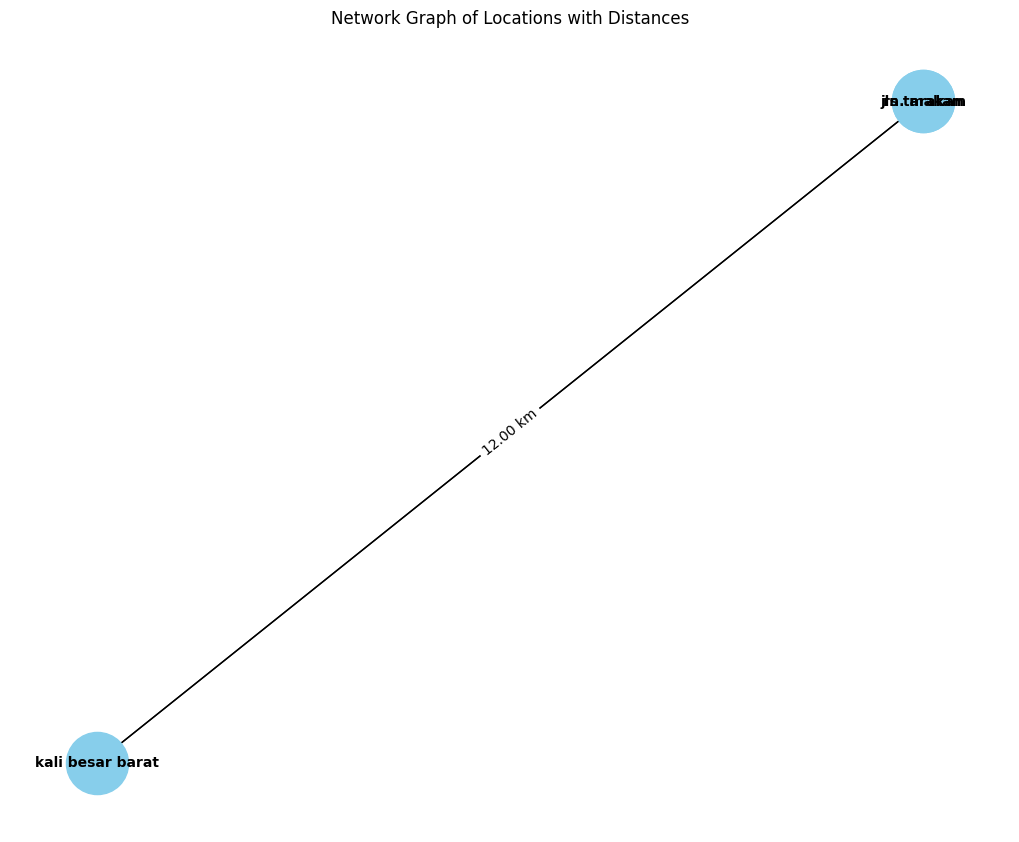

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Sample data (replace this with reading from a CSV file if necessary)
data = [
    {"location_name": "kali besar barat", "node_id": 1, "node_name": "blok m - kota", "lat": -6.135355, "lon": 106.81143, "connected_to": "kali besar barat", "distance_km": 0.527083333},
    {"location_name": "kali besar barat", "node_id": 1, "node_name": "blok m - kota", "lat": -6.135355, "lon": 106.81143, "connected_to": "rs tarakan", "distance_km": 0.191666667},
    {"location_name": "rs tarakan", "node_id": "10h", "node_name": "tanjung priok - blok m", "lat": -6.171114, "lon": 106.810112, "connected_to": "kali besar barat", "distance_km": 0.191666667},
    {"location_name": "kali besar barat", "node_id": 1, "node_name": "blok m - kota", "lat": -6.135355, "lon": 106.81143, "connected_to": "jln. makam", "distance_km": 12.0},
]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes with unique identifiers
for idx, row in df.iterrows():
    G.add_node(row["connected_to"],
               lat=row["lat"],
               lon=row["lon"],
               name=row["node_name"],
               location_name=row["location_name"])

# Add edges with distances as weights
for idx, row in df.iterrows():
    if row["location_name"] != row["connected_to"]:  # Avoid self-loops unless necessary
        G.add_edge(row["location_name"], row["connected_to"], weight=row["distance_km"])

# Position nodes based on latitude and longitude (handling missing lat/lon)
pos = {node: (G.nodes[node].get("lon", 0), G.nodes[node].get("lat", 0))
       for node in G.nodes}

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')

# Label edges with distance values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={key: f"{value:.2f} km" for key, value in edge_labels.items()})

# Show the plot
plt.title("Network Graph of Locations with Distances")
plt.show()


**Coba Data dari CSV**

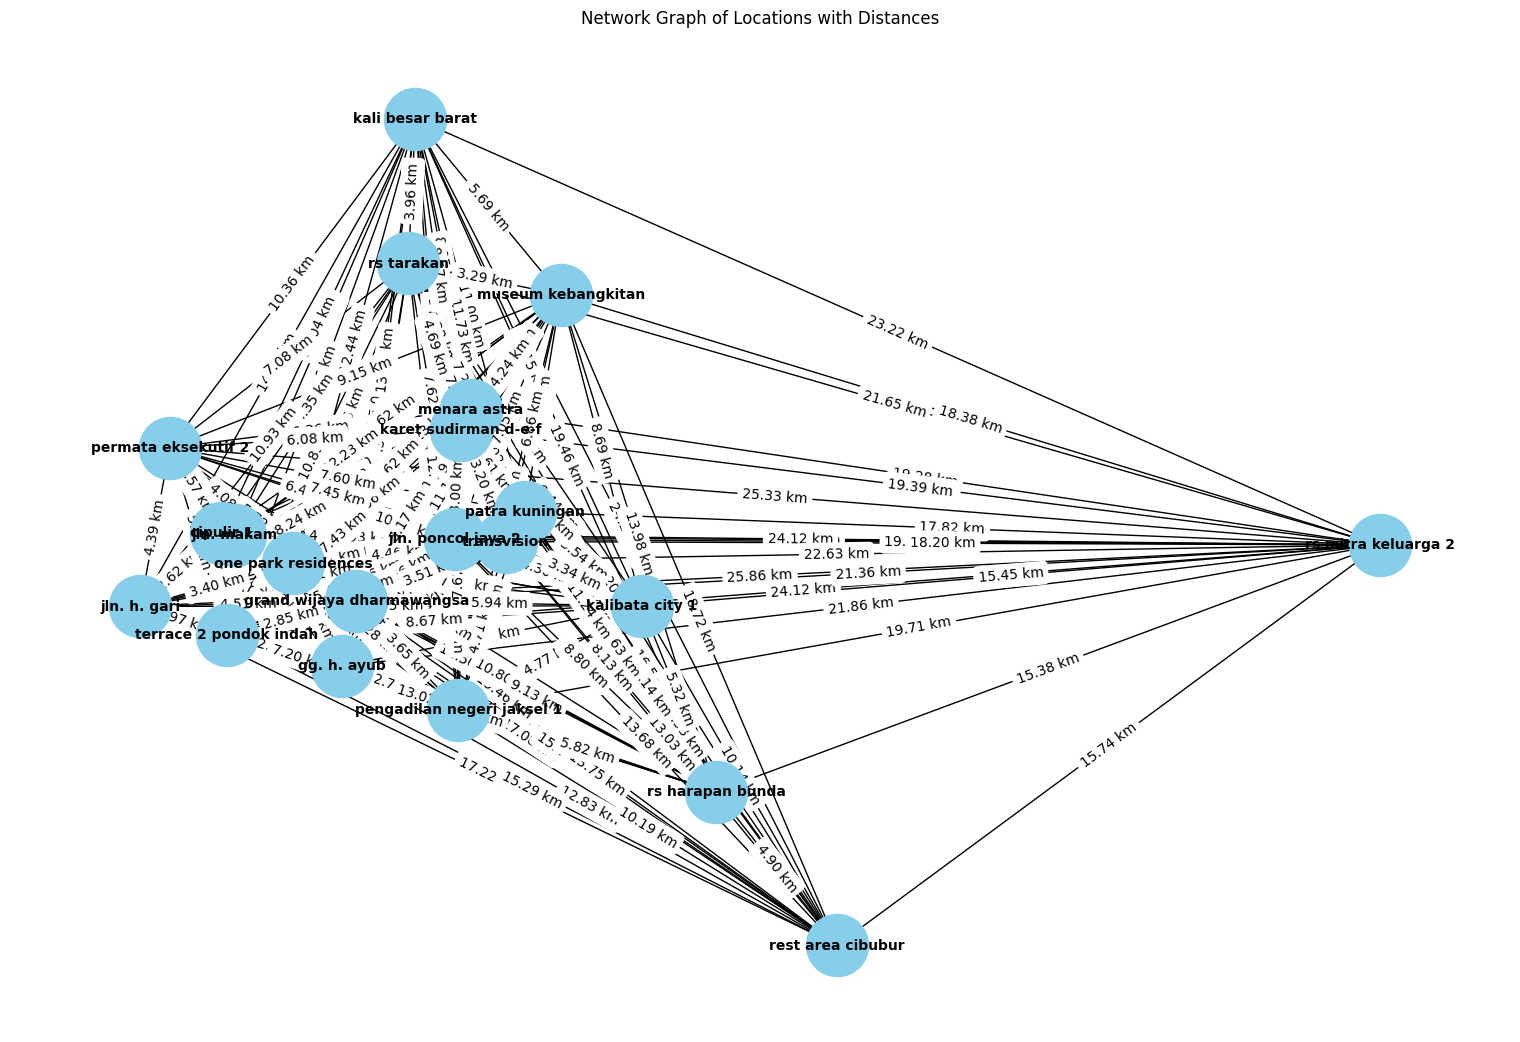

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

csv_file = 'hasil_perhitungan_bersih.csv'
df = pd.read_csv(csv_file)

G = nx.Graph()

for idx, row in df.iterrows():
    G.add_node(
        row["location_name"],
        lat=row["lat"],
        lon=row["lon"],
        name=row["node_name"]
    )

for idx, row in df.iterrows():
    if row["location_name"] != row["connected_to"]:  # Avoid self-loops
        G.add_edge(
            row["location_name"],
            row["connected_to"],
            weight=row["distance_km"]
        )

pos = {
    node: (G.nodes[node]["lon"], G.nodes[node]["lat"])
    for node in G.nodes if "lat" in G.nodes[node] and "lon" in G.nodes[node]
}

# Plot the graph
plt.figure(figsize=(15, 10))
nx.draw(
    G, pos, with_labels=True,
    node_size=2000, node_color='skyblue',
    font_size=10, font_weight='bold'
)

# Label edges with distance values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={key: f"{value:.2f} km" for key, value in edge_labels.items()}
)

# Show the plot
plt.title("Network Graph of Locations with Distances")
plt.show()


## **Algoritma A-Star**

In [ ]:
from heapq import heappop, heappush

def heuristic(node1, node2):
    """Heuristic function to estimate the distance between two nodes."""
    loc1 = (G.nodes[node1]['lat'], G.nodes[node1]['lon'])
    loc2 = (G.nodes[node2]['lat'], G.nodes[node2]['lon'])
    return geodesic(loc1, loc2).kilometers

def a_star(graph, start, goal):
    """A* algorithm to find the shortest path in a graph."""
    # Priority queue
    queue = []
    heappush(queue, (0, start))

    # Dictionaries to store distances and predecessors
    g_cost = {start: 0}
    f_cost = {start: heuristic(start, goal)}
    predecessors = {start: None}

    while queue:
        # Get the node with the lowest f_cost
        _, current = heappop(queue)

        # Goal reached
        if current == goal:
            # Reconstruct path
            path = []
            while current:
                path.append(current)
                current = predecessors[current]
            return path[::-1], g_cost[goal]

        # Explore neighbors
        for neighbor in graph.neighbors(current):
            tentative_g_cost = g_cost[current] + graph[current][neighbor]['weight']

            if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g_cost
                f_cost[neighbor] = tentative_g_cost + heuristic(neighbor, goal)
                predecessors[neighbor] = current
                heappush(queue, (f_cost[neighbor], neighbor))

    return None, float('inf')  # No path found


In [ ]:
# Input user: lokasi awal dan tujuan
start_node = input("Masukkan lokasi awal: ")
goal_node = input("Masukkan lokasi tujuan: ")

# Pastikan node ada di graph
if start_node not in G or goal_node not in G:
    print("Lokasi tidak ditemukan dalam graf.")
else:
    # Jalankan algoritma A*
    path, distance = a_star(G, start_node, goal_node)
    if path:
        print(f"Jalur terpendek: {' -> '.join(path)}")
        print(f"Total jarak: {distance:.2f} km")

        # Visualisasi jalur di graf
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        plt.figure(figsize=(15, 10))
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightgreen')
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
        plt.title(f"Jalur Terpendek dari {start_node} ke {goal_node}")
        plt.show()
    else:
        print("Tidak ada jalur yang ditemukan.")


Masukkan lokasi awal: monas
Masukkan lokasi tujuan: blok m
Lokasi tidak ditemukan dalam graf.


## **Algoritma Djikstra**

In [ ]:
def find_shortest_path(graph, start, goal):
    try:
        # Jalur terpendek menggunakan Dijkstra
        shortest_path = nx.dijkstra_path(graph, start, goal, weight="weight")
        total_distance = nx.dijkstra_path_length(graph, start, goal, weight="weight")
        return shortest_path, total_distance
    except nx.NetworkXNoPath:
        return None, float('inf')

# Input user: lokasi awal dan tujuan
start_node = input("Masukkan lokasi awal: ")
goal_node = input("Masukkan lokasi tujuan: ")

# Pastikan node ada di graph
if start_node not in G or goal_node not in G:
    print("Lokasi tidak ditemukan dalam graf.")
else:
    # Jalankan algoritma Dijkstra
    path, distance = find_shortest_path(G, start_node, goal_node)
    if path:
        print(f"Jalur terpendek: {' -> '.join(path)}")
        print(f"Total jarak: {distance:.2f} km")

        # Visualisasi jalur di graf
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        plt.figure(figsize=(15, 10))
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightgreen')
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
        plt.title(f"Jalur Terpendek dari {start_node} ke {goal_node}")
        plt.show()
    else:
        print("Tidak ada jalur yang ditemukan.")


Masukkan lokasi awal: monas
Masukkan lokasi tujuan: blok m
Lokasi tidak ditemukan dalam graf.


# **COBA GEOPY DJIKSTRA**

In [ ]:
!pip install geopy
!pip install folium
!pip install osmnx
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.
tensorflow-metadata 1.13.1

In [ ]:
#library
from geopy.distance import geodesic
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
from heapq import heappop, heappush
import requests
from pprint import pprint
from geopy.geocoders import Nominatim
import folium
import seaborn as sns
import plotly.express as px
import osmnx as ox
import networkx as nx
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
import pandas as pd
import folium

# Raw data as a string for demonstration
data = """
location_name,node_id,node_name,lat,lon,connected_to,distance_km
kali besar barat,1,blok m - kota,-6.135355,106.81143,kali besar barat,0.527083333
kali besar barat,1,blok m - kota,-6.135355,106.81143,rs tarakan,0.191666667
rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,0.191666667
kali besar barat,1,blok m - kota,-6.135355,106.81143,jln. makam,12.00
jln. makam,1c,pesanggrahan - blok m,-6.238418,106.677745,kali besar barat,12.00
kali besar barat,1,blok m - kota,-6.135355,106.81143,gg. h. ayub,15.06
gg. h. ayub,1e,pondok labu - blok m,-6.270874,106.679762,kali besar barat,15.06
kali besar barat,1,blok m - kota,-6.135355,106.81143,rest area cibubur,24.27
rest area cibubur,1k,cibubur junction - blok m,-6.339993,106.689078,kali besar barat,24.27
"""

# Load the data into a DataFrame
from io import StringIO

dtf = pd.read_csv(StringIO(data))

# Rename columns lat to y and lon to x
dtf.rename(columns={'lat': 'y', 'lon': 'x'}, inplace=True)

# Create a folium map centered at the average latitude and longitude
map_center = [dtf['y'].mean(), dtf['x'].mean()]
m = folium.Map(location=map_center, zoom_start=12, tiles="OpenStreetMap")

# Add markers for each location
for _, row in dtf.iterrows():
    folium.Marker(
        location=[row['y'], row['x']],
        popup=f"<b>Location:</b> {row['location_name']}<br><b>Node:</b> {row['node_name']}",
        tooltip=row['location_name']
    ).add_to(m)

m

In [ ]:
start = [dtf['y'].iloc[1], dtf['x'].iloc[1]]
start


[-6.135355, 106.81143]

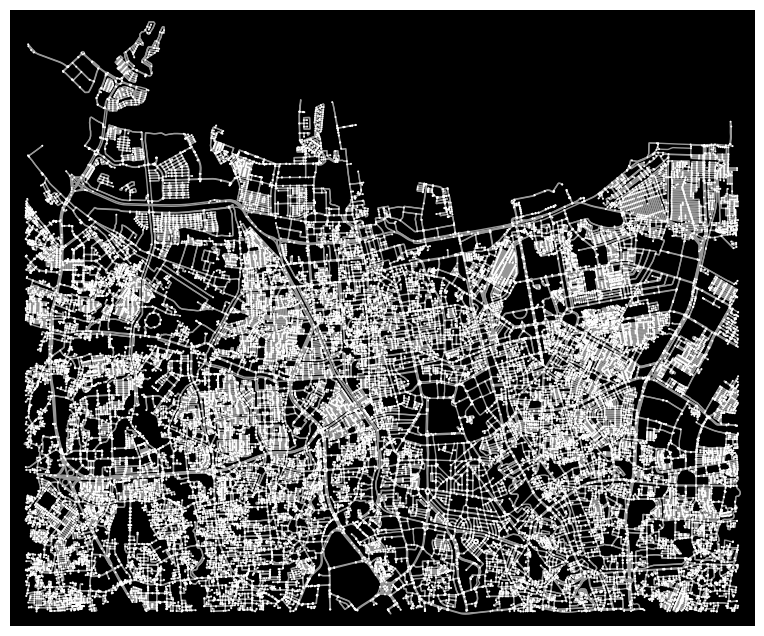

In [ ]:
# Create a graph from the starting point
G = ox.graph_from_point(start, dist=10000, network_type='drive')

# Add edge speeds (km/h) and travel times (seconds) to the graph
G = ox.add_edge_speeds(G)  # Add speed data to each edge
G = ox.add_edge_travel_times(G)  # Calculate travel time for each edge

fig, ax = ox.plot_graph(G, node_size=2,node_color='white', bgcolor='k', figsize=(16,8))


In [ ]:
from geopy.distance import geodesic

# Define the starting point (latitude, longitude)
start_point = (start[0], start[1])  # Assuming start = (latitude, longitude)

# Extract nodes and their coordinates
nodes, data = zip(*G.nodes(data=True))
coordinates = [(d['y'], d['x']) for d in data]

# Compute distances to the starting point
distances = [geodesic(start_point, coord).meters for coord in coordinates]

# Find the nearest node to the starting point
nearest_node = nodes[distances.index(min(distances))]

# Apply the same logic to find the nearest node for each row in the DataFrame
def find_nearest_node(row):
    try:
        # Calculate distances for each coordinate and find the nearest node
        node_distances = [geodesic((row['y'], row['x']), coord).meters for coord in coordinates]
        nearest_idx = node_distances.index(min(node_distances))  # Index of the nearest node
        return nodes[nearest_idx]
    except ValueError:
        # Handle exception if there's an issue calculating the distance
        return None  # Or handle it however you prefer

# Apply function to DataFrame to create 'node' column
dtf['node'] = dtf.apply(find_nearest_node, axis=1)

# Display the first few rows with the new 'node' column
dtf.head()


,location_name,node_id,node_name,y,x,connected_to,distance_km,node
0,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,0.527083,3724055370
1,kali besar barat,1,blok m - kota,-6.135355,106.811430,rs tarakan,0.191667,3724055370
2,rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,0.191667,318168806
3,kali besar barat,1,blok m - kota,-6.135355,106.811430,jln. makam,12.000000,3724055370
4,jln. makam,1c,pesanggrahan - blok m,-6.238418,106.677745,kali besar barat,12.000000,11256250641


In [ ]:
import osmnx as ox

start_node = ox.distance.nearest_nodes(G, start[1], start[0])
dtf['node'] = dtf[['y', 'x']].apply(lambda x: ox.distance.nearest_nodes(G, x['x'], x['y']), axis=1)

dtf = dtf.drop_duplicates(subset='node', keep='first')
dtf.head()


,location_name,node_id,node_name,y,x,connected_to,distance_km,node
0,kali besar barat,1,blok m - kota,-6.135355,106.811430,kali besar barat,0.527083,3724055370
2,rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,0.191667,318168806
4,jln. makam,1c,pesanggrahan - blok m,-6.238418,106.677745,kali besar barat,12.000000,11256250641
8,rest area cibubur,1k,cibubur junction - blok m,-6.339993,106.689078,kali besar barat,24.270000,344615811


In [ ]:
def f(a, b):
    if a not in G.nodes() or b not in G.nodes():
        return np.nan  # Return NaN if nodes aren't in the graph
    try:
        d = nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except Exception as e:
        #print(f"Error calculating distance from {a} to {b}: {e}")
        d = np.nan
    return d

# Calculate the distance matrix
distance_matrix = np.asarray([[f(a, b) for b in dtf["node"].tolist()] for a in dtf["node"].tolist()])
distance_matrix = pd.DataFrame(distance_matrix, columns=dtf["node"].values, index=dtf["node"].values)

# Display the distance matrix
distance_matrix.head()


,3724055370,318168806,11256250641,344615811
3724055370,0.000000,650.074595,1770.643591,1753.077202
318168806,454.630417,0.000000,1244.817241,1227.250851
11256250641,1670.432100,1243.188279,0.000000,50.597002
344615811,1654.180879,1226.937059,49.343887,0.000000


<ipython-input-37-0b8297a28ec8>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap = heatmap.applymap(lambda x: 0.3 if pd.isnull(x) else  # Handle NaN


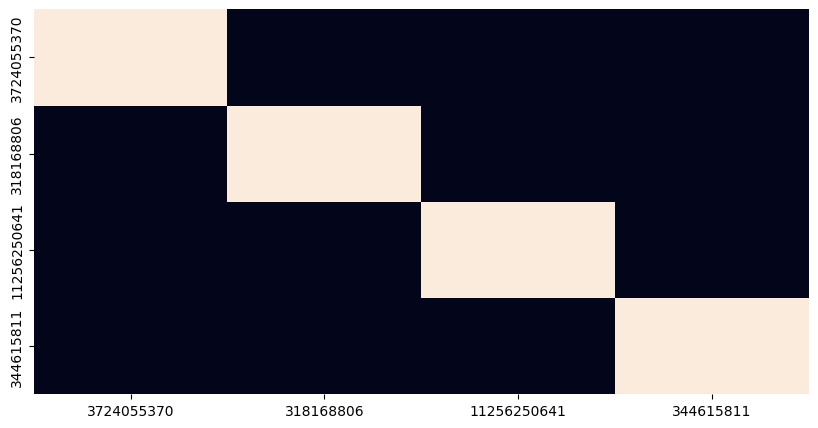

In [ ]:
heatmap = distance_matrix.copy()
heatmap = heatmap.applymap(lambda x: 0.3 if pd.isnull(x) else  # Handle NaN
                          (0.7 if np.isinf(x) else        # Handle Inf
                           (0 if x != 0 else 1)))          # Handle 0s and non-zeros

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(heatmap, vmin=0, vmax=1, cbar=False, ax=ax)

plt.show()

In [ ]:
distance_matrix=distance_matrix.round()
distance_matrix=distance_matrix.astype('int')
distance_matrix

,3724055370,318168806,11256250641,344615811
3724055370,0,650,1771,1753
318168806,455,0,1245,1227
11256250641,1670,1243,0,51
344615811,1654,1227,49,0


In [ ]:
#start_node=3724055370
drivers = 1
lst_nodes= dtf["node"].tolist()
print('start:', start_node, "total locations to visit", len(lst_nodes)-1, "drivers", drivers)

start: 3724055370 total locations to visit 3 drivers 1


In [ ]:
manager = pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
mode1 = pywrapcp.RoutingModel(manager)

In [ ]:
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]
distance = mode1.RegisterTransitCallback(get_distance)
mode1.SetArcCostEvaluatorOfAllVehicles(distance)

paarameters = pywrapcp.DefaultRoutingSearchParameters()
paarameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [ ]:
solution = mode1.SolveWithParameters(paarameters)

index=mode1.Start(0)
route_idx, route_distance = [], 0

while not mode1.IsEnd(index):
    route_idx.append(manager.IndexToNode(index))
    previous_index = index
    index = solution.Value(mode1.NextVar(index))

    try:
      route_distance+= get_distance(previous_index, index)
    except:
      route_distance+= mode1.GetArcCostForVehicle(from_index=previous_index, to_index=index, vehicle=0)

print(route_idx)
print(f"Total distance: {round(route_distance/1000,2)}km")
print(f"Nodes visted: {len(route_idx)}")

[0, 3, 1, 2]
Total distance: 4.22km
Nodes visted: 4


In [ ]:
# Print the route for the driver
print("Route for driver (nodes):")
lst_route = [lst_nodes[i] for i in route_idx]
print(lst_route)

# Print the locations and node names from the DataFrame
print("Pemberhentian yang dilewati:")
for idx, row in dtf.iterrows():
    print(f"Halte Bus: {row['location_name']}, Jurusan: {row['node_name']}")

Route for driver (nodes):
[3724055370, 344615811, 318168806, 11256250641]
Pemberhentian yang dilewati:
Halte Bus: kali besar barat, Jurusan: blok m - kota
Halte Bus: rs tarakan, Jurusan: tanjung priok - blok m
Halte Bus: jln. makam, Jurusan: pesanggrahan - blok m
Halte Bus: rest area cibubur, Jurusan: cibubur junction - blok m


# **DJIKSTRA**

In [2]:
  !pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 2.9 MB/s eta 0:00:00


DJIKSTRA FIX BGT


In [ ]:
import folium
import networkx as nx
import osmnx as ox

def debug_route_visualization(G, route, stops_info):
    """
    Function to visualize the route on a Folium map with detailed stops information, using Dijkstra algorithm.

    Parameters:
        G (networkx.MultiDiGraph): The graph representing the road network.
        route (list): List of node IDs representing the route.
        stops_info (list): List of dictionaries containing stop names and other details.

    Returns:
        folium.Map: A Folium map with the route and stops visualized.
    """
    # Initialize the map centered on the first stop
    first_stop = G.nodes[route[0]]
    route_map = folium.Map(location=[first_stop['y'], first_stop['x']], zoom_start=14, tiles="OpenStreetMap")

    # Generate the full route path using Dijkstra algorithm
    full_path = []
    for i in range(len(route) - 1):
        try:
            # Compute shortest path between consecutive nodes using Dijkstra algorithm
            # Check if both source and target nodes are in the graph
            if route[i] in G.nodes and route[i + 1] in G.nodes:
                # Use dijkstra_path for the shortest path
                segment_path = nx.dijkstra_path(
                    G,
                    source=route[i],
                    target=route[i + 1],
                    weight='length'
                )
                full_path.extend(segment_path[:-1])  # Avoid duplicates at segment ends
            else:
                print(f"Warning: Either node {route[i]} or {route[i + 1]} is not in the graph. Skipping this segment.")
        except nx.NetworkXNoPath:
            print(f"No path between {route[i]} and {route[i + 1]}")
    full_path.append(route[-1])  # Add the last node

    # Plot the route on the map
    coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in full_path if node in G.nodes]
    folium.PolyLine(coords, color="blue", weight=5, opacity=0.7).add_to(route_map)

    # Add markers for each stop
    for node, stop_info in zip(route, stops_info):
        if node in G.nodes:
            node_data = G.nodes[node]
            popup_content = f"<b>{stop_info['stop_name']}</b><br>Jurusan: {stop_info['jurusan']}"
            folium.Marker(
                location=[node_data['y'], node_data['x']],
                popup=popup_content,
                tooltip=stop_info['stop_name']
            ).add_to(route_map)

    return route_map

# Ensure G is defined and loaded before calling the function
# Download the graph for Jakarta if it's not already loaded
G = ox.graph_from_place("Jakarta, Indonesia", network_type="drive")

# Example data for Roa Malaka to Paku Raya and Cdeng to Paku Raya
route = [ox.nearest_nodes(G, 106.81155, -6.1352),  # Roa Malaka
         ox.nearest_nodes(G, 106.78985, -6.2556),  # Paku Raya
         ox.nearest_nodes(G, 106.85058, -6.1302),  # Cdeng
         ox.nearest_nodes(G, 106.78985, -6.2556)]  # Paku Raya

stops_info = [
    {"stop_name": "Halte Roa Malaka", "jurusan": "Blok M - Kota"},
    {"stop_name": "Halte Paku Raya", "jurusan": "Blok M - Lebak Bulus"},
    {"stop_name": "Halte Cdeng", "jurusan": "Pasar Minggu - Blok M"},
    {"stop_name": "Halte Paku Raya", "jurusan": "Cibubur - Blok M"}
]

# Debug and visualize the route using Dijkstra algorithm
debug_map = debug_route_visualization(G, route, stops_info)

# Now you can use debug_map to display or save the map
debug_map


In [6]:
import folium
import networkx as nx
import osmnx as ox
from IPython.display import display

def calculate_distance_dijkstra(G, route):
    """
    Calculates the shortest distance for a route with multiple stops using Dijkstra's algorithm.

    Parameters:
    - G: A NetworkX graph.
    - route: List of node IDs representing the route.

    Returns:
    - Total distance of the route.
    """
    try:
        total_distance = 0
        for i in range(len(route) - 1):
            # Use Dijkstra's algorithm for the shortest path between consecutive nodes
            distance = nx.shortest_path_length(
                G,
                source=route[i],
                target=route[i + 1],
                weight="length",
                method="dijkstra"  # Use Dijkstra's algorithm
            )
            total_distance += distance
        return total_distance
    except nx.NetworkXNoPath:
        print("No path found between some nodes in the route.")
        return None
    except Exception as e:
        print(f"An error occurred during distance calculation: {e}")
        return None

def print_route_street_names(G, route):
    """
    Prints the street names for the route.

    Parameters:
    - G: A NetworkX graph.
    - route: List of node IDs representing the route.

    Returns:
    - None
    """
    try:
        print("Streets in the route:")
        for i in range(len(route) - 1):
            u, v = route[i], route[i + 1]
            if G.has_edge(u, v):
                edge_data = G.get_edge_data(u, v)
                street_name = edge_data[0].get('name', 'Unnamed Road')
                print(f"From {u} to {v}: {street_name}")
            else:
                print(f"No direct edge between {u} and {v}.")
    except Exception as e:
        print(f"An error occurred while printing street names: {e}")

def debug_straight_route_visualization(G, route, stops_info):
    """
    Visualize a straight-line route connecting stops and display the calculated distance.

    Parameters:
        G (networkx.MultiDiGraph): The graph representing the road network.
        route (list): List of node IDs representing the route.
        stops_info (list): List of dictionaries containing stop names and other details.

    Returns:
        folium.Map: A Folium map with the straight-line route and stops visualized.
    """
    # Initialize the map centered on the first stop
    first_stop = G.nodes[route[0]]
    route_map = folium.Map(location=[first_stop['y'], first_stop['x']], zoom_start=14, tiles="OpenStreetMap")

    # Gather the coordinates of the stops
    coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route if node in G.nodes]

    # Draw straight lines between consecutive stops
    for i in range(len(coords) - 1):
        folium.PolyLine([coords[i], coords[i + 1]], color="red", weight=3, opacity=0.7).add_to(route_map)

    # Add markers for each stop
    for node, stop_info in zip(route, stops_info):
        if node in G.nodes:
            node_data = G.nodes[node]
            popup_content = f"<b>{stop_info['stop_name']}</b><br>Jurusan: {stop_info['jurusan']}"
            folium.Marker(
                location=[node_data['y'], node_data['x']],
                popup=popup_content,
                tooltip=stop_info['stop_name']
            ).add_to(route_map)

    return route_map

# Main execution
try:
    # Download the graph for Jakarta
    print("Downloading Jakarta road network graph...")
    G = ox.graph_from_place("Jakarta, Indonesia", network_type="drive")

    # Example data for Roa Malaka to Paku Raya and Cdeng to Paku Raya
    route = [ox.nearest_nodes(G, 106.81155, -6.1352),  # Roa Malaka
             ox.nearest_nodes(G, 106.78985, -6.2556),  # Paku Raya
             ox.nearest_nodes(G, 106.85058, -6.1302),  # Cdeng
             ox.nearest_nodes(G, 106.78985, -6.2556)]  # Paku Raya

    stops_info = [
        {"stop_name": "Halte Roa Malaka", "jurusan": "Blok M - Kota"},
        {"stop_name": "Halte Paku Raya", "jurusan": "Blok M - Lebak Bulus"},
        {"stop_name": "Halte Cdeng", "jurusan": "Pasar Minggu - Blok M"},
        {"stop_name": "Halte Paku Raya", "jurusan": "Cibubur - Blok M"}
    ]

    # Calculate the total distance using Dijkstra's algorithm
    print("Calculating the total distance of the route using Dijkstra's algorithm...")
    total_distance = calculate_distance_dijkstra(G, route)

    if total_distance is None:
        print("Could not calculate the total distance.")
    else:
        print(f"The total distance of the route is {total_distance:.2f} meters.")

    # Print street names for the route
    print_route_street_names(G, route)

    # Visualize the straight-line route
    print("Visualizing the route on a map...")
    debug_map = debug_straight_route_visualization(G, route, stops_info)
    display(debug_map)  # Display the map in a Jupyter Notebook

except Exception as e:
    print(f"An error occurred: {e}")


Calculating the total distance of the route using Dijkstra's algorithm...
The total distance of the route is 54868.18 meters.
Streets in the route:
No direct edge between 3724055370 and 1709425604.
No direct edge between 1709425604 and 393098019.
No direct edge between 393098019 and 1709425604.
Visualizing the route on a map...


A STAR FIX TOTAL


In [ ]:
import folium
import networkx as nx
import osmnx as ox
from math import radians, cos, sin, sqrt, atan2

def debug_route_visualization(G, route, stops_info):
    """
    Function to visualize the route on a Folium map with detailed stops information, using A* algorithm.

    Parameters:
        G (networkx.MultiDiGraph): The graph representing the road network.
        route (list): List of node IDs representing the route.
        stops_info (list): List of dictionaries containing stop names and other details.

    Returns:
        folium.Map: A Folium map with the route and stops visualized.
    """
    # Initialize the map centered on the first stop
    first_stop = G.nodes[route[0]]
    route_map = folium.Map(location=[first_stop['y'], first_stop['x']], zoom_start=14, tiles="OpenStreetMap")

    # Helper function for A* heuristic
    def heuristic(n1, n2):
        # Get coordinates of both nodes
        y1, x1 = G.nodes[n1]['y'], G.nodes[n1]['x']
        y2, x2 = G.nodes[n2]['y'], G.nodes[n2]['x']

        # Convert to radians
        lat1, lon1 = radians(y1), radians(x1)
        lat2, lon2 = radians(y2), radians(x2)

        # Haversine formula
        R = 6371000  # Earth's radius in meters
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))

        return R * c

    # Generate the full route path using A* algorithm
    full_path = []
    for i in range(len(route) - 1):
        try:
            # Check if both source and target nodes are in the graph
            if route[i] in G.nodes and route[i + 1] in G.nodes:
                # Use A* algorithm for the shortest path
                segment_path = nx.astar_path(
                    G,
                    source=route[i],
                    target=route[i + 1],
                    heuristic=lambda n1, n2: heuristic(n1, n2),
                    weight='length'
                )
                full_path.extend(segment_path[:-1])  # Avoid duplicates at segment ends
            else:
                print(f"Warning: Either node {route[i]} or {route[i + 1]} is not in the graph. Skipping this segment.")
        except nx.NetworkXNoPath:
            print(f"No path between {route[i]} and {route[i + 1]}")

    full_path.append(route[-1])  # Add the last node

    # Plot the route on the map
    coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in full_path if node in G.nodes]
    folium.PolyLine(coords, color="blue", weight=5, opacity=0.7).add_to(route_map)

    # Add markers for each stop
    for node, stop_info in zip(route, stops_info):
        if node in G.nodes:
            node_data = G.nodes[node]
            popup_content = f"<b>{stop_info['stop_name']}</b><br>Jurusan: {stop_info['jurusan']}"
            folium.Marker(
                location=[node_data['y'], node_data['x']],
                popup=popup_content,
                tooltip=stop_info['stop_name']
            ).add_to(route_map)

    return route_map

# Ensure G is defined and loaded before calling the function
# Download the graph for Jakarta if it's not already loaded
G = ox.graph_from_place("Jakarta, Indonesia", network_type="drive")

# Example data for Roa Malaka to Paku Raya and Cdeng to Paku Raya
route = [
    ox.nearest_nodes(G, 106.81155, -6.1352),  # Roa Malaka
    ox.nearest_nodes(G, 106.78985, -6.2556),  # Paku Raya
    ox.nearest_nodes(G, 106.85058, -6.1302),  # Cdeng
    ox.nearest_nodes(G, 106.78985, -6.2556)   # Paku Raya
]

stops_info = [
    {"stop_name": "Halte Roa Malaka", "jurusan": "Blok M - Kota"},
    {"stop_name": "Halte Paku Raya", "jurusan": "Blok M - Lebak Bulus"},
    {"stop_name": "Halte Cdeng", "jurusan": "Pasar Minggu - Blok M"},
    {"stop_name": "Halte Paku Raya", "jurusan": "Cibubur - Blok M"}
]

# Debug and visualize the route using A* algorithm
debug_map = debug_route_visualization(G, route, stops_info)

# Now you can use debug_map to display or save the map
debug_map

In [ ]:
import folium
import networkx as nx
import osmnx as ox
from IPython.display import display

def calculate_distance_astar(G, route):
    """
    Calculates the shortest distance for a route with multiple stops using A* algorithm.

    Parameters:
    - G: A NetworkX graph.
    - route: List of node IDs representing the route.

    Returns:
    - Total distance of the route.
    """
    try:
        total_distance = 0
        for i in range(len(route) - 1):
            # Use A* algorithm for the shortest path between consecutive nodes
            distance = nx.shortest_path_length(
                G,
                source=route[i],
                target=route[i + 1],
                weight="length",
                method="astar",  # Use A* algorithm
                heuristic=lambda u, v: nx.shortest_path_length(G, source=u, target=v, weight="length")  # Straight-line heuristic
            )
            total_distance += distance
        return total_distance
    except nx.NetworkXNoPath:
        print("No path found between some nodes in the route.")
        return None
    except Exception as e:
        print(f"An error occurred during distance calculation: {e}")
        return None

def print_route_street_names(G, route):
    """
    Prints the street names for the route.

    Parameters:
    - G: A NetworkX graph.
    - route: List of node IDs representing the route.

    Returns:
    - None
    """
    try:
        print("Streets in the route:")
        for i in range(len(route) - 1):
            u, v = route[i], route[i + 1]
            if G.has_edge(u, v):
                edge_data = G.get_edge_data(u, v)
                street_name = edge_data[0].get('name', 'Unnamed Road')
                print(f"From {u} to {v}: {street_name}")
            else:
                print(f"No direct edge between {u} and {v}.")
    except Exception as e:
        print(f"An error occurred while printing street names: {e}")

def debug_straight_route_visualization(G, route, stops_info):
    """
    Visualize a straight-line route connecting stops and display the calculated distance.

    Parameters:
        G (networkx.MultiDiGraph): The graph representing the road network.
        route (list): List of node IDs representing the route.
        stops_info (list): List of dictionaries containing stop names and other details.

    Returns:
        folium.Map: A Folium map with the straight-line route and stops visualized.
    """
    # Initialize the map centered on the first stop
    first_stop = G.nodes[route[0]]
    route_map = folium.Map(location=[first_stop['y'], first_stop['x']], zoom_start=14, tiles="OpenStreetMap")

    # Gather the coordinates of the stops
    coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route if node in G.nodes]

    # Draw straight lines between consecutive stops
    for i in range(len(coords) - 1):
        folium.PolyLine([coords[i], coords[i + 1]], color="red", weight=3, opacity=0.7).add_to(route_map)

    # Add markers for each stop
    for node, stop_info in zip(route, stops_info):
        if node in G.nodes:
            node_data = G.nodes[node]
            popup_content = f"<b>{stop_info['stop_name']}</b><br>Jurusan: {stop_info['jurusan']}"
            folium.Marker(
                location=[node_data['y'], node_data['x']],
                popup=popup_content,
                tooltip=stop_info['stop_name']
            ).add_to(route_map)

    return route_map

# Main execution
try:
    # Download the graph for Jakarta
    print("Downloading Jakarta road network graph...")
    G = ox.graph_from_place("Jakarta, Indonesia", network_type="drive")

    # Example data for Roa Malaka to Paku Raya and Cdeng to Paku Raya
    route = [ox.nearest_nodes(G, 106.81155, -6.1352),  # Roa Malaka
             ox.nearest_nodes(G, 106.78985, -6.2556),  # Paku Raya
             ox.nearest_nodes(G, 106.85058, -6.1302),  # Cdeng
             ox.nearest_nodes(G, 106.78985, -6.2556)]  # Paku Raya

    stops_info = [
        {"stop_name": "Halte Roa Malaka", "jurusan": "Blok M - Kota"},
        {"stop_name": "Halte Paku Raya", "jurusan": "Blok M - Lebak Bulus"},
        {"stop_name": "Halte Cdeng", "jurusan": "Pasar Minggu - Blok M"},
        {"stop_name": "Halte Paku Raya", "jurusan": "Cibubur - Blok M"}
    ]

    # Calculate the total distance using A* algorithm
    print("Calculating the total distance of the route using A* algorithm...")
    total_distance = calculate_distance_astar(G, route)

    if total_distance is None:
        print("Could not calculate the total distance.")
    else:
        print(f"The total distance of the route is {total_distance:.2f} meters.")

    # Print street names for the route
    print_route_street_names(G, route)

    # Visualize the straight-line route
    print("Visualizing the route on a map...")
    debug_map = debug_straight_route_visualization(G, route, stops_info)
    display(debug_map)  # Display the map in a Jupyter Notebook

except Exception as e:
    print(f"An error occurred: {e}")


Calculating the total distance of the route using A* algorithm...
An error occurred during distance calculation: shortest_path_length() got an unexpected keyword argument 'heuristic'
Could not calculate the total distance.
Streets in the route:
No direct edge between 3724055370 and 1709425604.
No direct edge between 1709425604 and 393098019.
No direct edge between 393098019 and 1709425604.
Visualizing the route on a map...


In [ ]:
import pandas as pd
import numpy as np

# ... (Rest of the functions: verify_locations, comprehensive_location_debug, prepare_route_nodes) ...

# Create the DataFrame (dtf) here as it is missing in this cell's scope
data = """
location_name,node_id,node_name,lat,lon,connected_to,distance_km
kali besar barat,1,blok m - kota,-6.135355,106.81143,kali besar barat,0.527083333
kali besar barat,1,blok m - kota,-6.135355,106.81143,rs tarakan,0.191666667
rs tarakan,10h,tanjung priok - blok m,-6.171114,106.810112,kali besar barat,0.191666667
kali besar barat,1,blok m - kota,-6.135355,106.81143,jln. makam,12.00
jln. makam,1c,pesanggrahan - blok m,-6.238418,106.677745,kali besar barat,12.00
kali besar barat,1,blok m - kota,-6.135355,106.81143,gg. h. ayub,15.06
gg. h. ayub,1e,pondok labu - blok m,-6.270874,106.679762,kali besar barat,15.06
kali besar barat,1,blok m - kota,-6.135355,106.81143,rest area cibubur,24.27
rest area cibubur,1k,cibubur junction - blok m,-6.339993,106.689078,kali besar barat,24.27
"""

# Load the data into a DataFrame
from io import StringIO
dtf = pd.read_csv(StringIO(data))

# Rename columns lat to y and lon to x
dtf.rename(columns={'lat': 'y', 'lon': 'x'}, inplace=True)

# Run comprehensive debugging
comprehensive_location_debug(dtf)

# ... (Rest of the code) ...

DataFrame Basic Information:
Total rows: 9
Columns: ['location_name', 'node_id', 'node_name', 'y', 'x', 'connected_to', 'distance_km']

--- Location Verification Report ---
Total locations: 9

Columns in DataFrame:
['location_name', 'node_id', 'node_name', 'y', 'x', 'connected_to', 'distance_km']

Coordinate Summary:
              y           x
count  9.000000    9.000000
mean  -6.188575  106.768205
std    0.076364    0.064580
min   -6.339993  106.677745
25%   -6.238418  106.689078
50%   -6.135355  106.811430
75%   -6.135355  106.811430
max   -6.135355  106.811430

Coordinate Validity:
Valid Latitudes: 9 out of 9
Valid Longitudes: 9 out of 9

Location Search Results:
No matches found for 'Roa Malaka'
No matches found for 'Cideng'
No matches found for 'Paku Jaya'

Unique Locations:
5

Duplicate Locations:
      location_name      node_name         y          x
0  kali besar barat  blok m - kota -6.135355  106.81143
1  kali besar barat  blok m - kota -6.135355  106.81143
3  kali besar ba